In [103]:
import re
import numpy as np
import pandas as pd
import scipy.cluster
import scipy.spatial
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('../peptidome.mplstyle')

import sys
sys.path.append('..')
from lib import *

datadir = '/home/amayer/lptcloud/data/viraldbs/'


In [3]:
filepath = datadir + 'HCV.fasta'

In [4]:
headers, seqs = list(zip(*[(h,s) for h,s in fasta_iter(filepath)]))


In [120]:
dfs = []
for seq in seqs:
    counter = Counter([seq], k=1)
    dfs.append(counter.to_df())

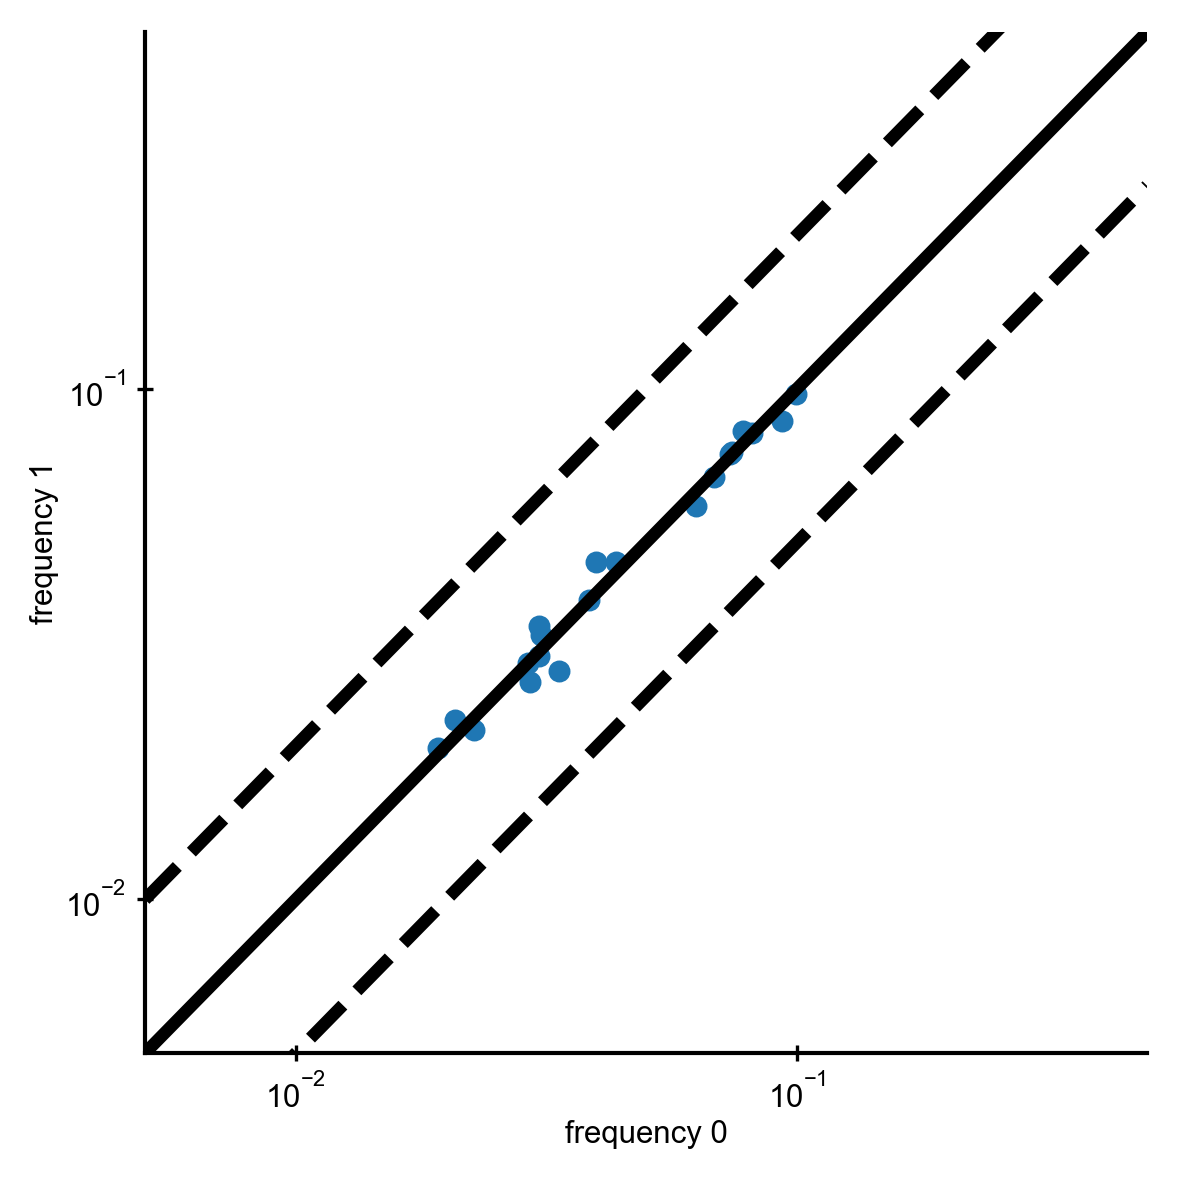

In [122]:
#df0, df1 = dfs[0], dfs[200]
df0, df1 = dfs[0], dfs[100]
dfmerged = pd.merge(df0, df1, on='seq', suffixes=['_0', '_1'])
fig, ax = plt.subplots(figsize=(4, 4))
xmin, xmax = 0.5e-2, 5e-1
x = np.logspace(np.log10(xmin), np.log10(xmax))
ax.plot(x, x, 'k', lw=3)
ax.plot(x, x*2, '--k', lw=3)
ax.set_xlim(xmin, xmax)
ax.set_ylim(xmin, xmax)
ax.plot(x, x/2, '--k', lw=3)
dfmerged.plot(x='freq_0', y='freq_1', kind='scatter', logx=True, logy=True, ax=ax);
ax.set_xlabel('frequency 0')
ax.set_ylabel('frequency 1')
fig.tight_layout()


In [115]:
dfmeta = pd.DataFrame(dict(header=headers, seq=seqs, length=lens))

In [116]:
dfmeta_n = dfmeta.iloc[names]
cluster = scipy.cluster.hierarchy.cut_tree(Z, n_clusters=3).flatten()
dfmeta_n['cluster'] = cluster
dfmeta_n.sort_values('cluster')

/home/amayer/.conda/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,header,seq,length,cluster
1732,_.CN._.HH064.KJ678767,CEELLSSRRKRLAMALV$VSYSLQAPPSRESHSGLRNR$VHRNCQD...,3142,0
932,1a.US.2003.HCV-1a/US/BID-V110/2003.EU256086,VQPPGPPLPGRAIVVCGTR$VHRNCQDDRVLSWINPLNAWRFGRAP...,3115,0
1309,1a.US._.V2520.HQ850281,CSLQDPPSRESHSGLRNR$VHRNCQDDRVLSWINPLNAWRFGRAPA...,3076,0
2527,_._.2014.sP115799.KY620524,GGPGGCATLHHGSLPCEELLSSRGKRLAMALVRVSCSLQDPPSRES...,3159,0
1154,1a.US._.L844PT.EU781801,SLQDPPSRESHSGLRNR$VHRNCQDDRVLSWINPLNAWRFGRAPAR...,3096,0
1026,1a.CH.2005.HCV-1a/CH/BID-V227/2005.EU482853,AMALV$VSCSLQDPPSRESHSGLRNR$VHRNCQDDRVLSWINPLNA...,3099,0
1802,_.US.2002.10051TF.UC1.KM043285,ASPLMGATLHHESLPCEELLSSRRKRLAMALV$VSCSLQDPPSRES...,3195,0
843,1a.US.2003.HCV-1a/US/BID-V107/2003.EU255996,AKRLAMALV$VSCSLQDPPSRESHSGLRNR$VHRNCQDDRVLSWIN...,3105,0
2345,_._.2013.sP108713.KY620340,ADHYGSPGRGGPGGCTTLRHESLPCEELLSSRRKRLAMALV$VSYS...,3170,0
1304,1b._.2008.Barcelona_HCV1_(BHCV1).HQ719473,ASPRLGATLHHRSLPCEELLSSRRKRLAMALV$VSCSLQDPPSRES...,3127,0


In [132]:
dfmeta['type'] = dfmeta['header'].apply(lambda s: s.split('.')[0])
dfmeta.type.value_counts()

_        1154
1a       1094
1b        457
2b        103
3a         51
2a         33
6a         21
4a         18
2          10
5a         10
2c          9
4v          7
4k          7
4f          6
4r          6
4d          5
6n          5
3i          5
6k          5
4q          5
2j          5
8           4
6u          4
2i          4
3b          4
6t          4
6e          4
4b          4
6v          4
2m          4
         ... 
6w          2
3           2
4L          2
6g          2
3h          2
4l          1
7           1
1g          1
6h          1
5           1
6c          1
4c          1
4s          1
6q          1
1/2b        1
2r          1
6p          1
2d          1
6r          1
1e          1
4t          1
8a          1
2b6w        1
2i/6p       1
6s          1
7a          1
1a1c        1
2e          1
6d          1
4p          1
Name: type, Length: 89, dtype: int64

In [137]:
dfs = []
for seq in seqs:
    seq = re.sub('#|\$', '', seq)
    counter = Counter([seq], k=2)
    dfs.append(counter.to_df(norm=False))

In [143]:
pseudocount = 1.0
names = np.random.choice(list(dfmeta[dfmeta['type'] == '1a'].index), replace=False, size=40)
N = len(names)
distances_uniform = np.zeros(N)
distances = np.zeros((N, N))
for i, namei in enumerate(names):
    df1 = dfs[namei]
    f1 = np.asarray(list(df1['count']))
    f1 += pseudocount*np.ones_like(f1)
    f2 = pseudocount*np.ones_like(f1)
    distances_uniform[i] = calc_jsd(f1, f2)
    for j, namej in enumerate(names):
        df2 = dfs[namej]
        dfm = pd.merge(df1, df2, on='seq', suffixes=['_1', '_2'])
        f1, f2 = np.asarray(dfm['count_1']), np.asarray(dfm['count_2'])
        f1 += pseudocount*np.ones_like(f1)
        f2 += pseudocount*np.ones_like(f2)
        distances[i, j] = calc_jsd(f1, f2, base=2)


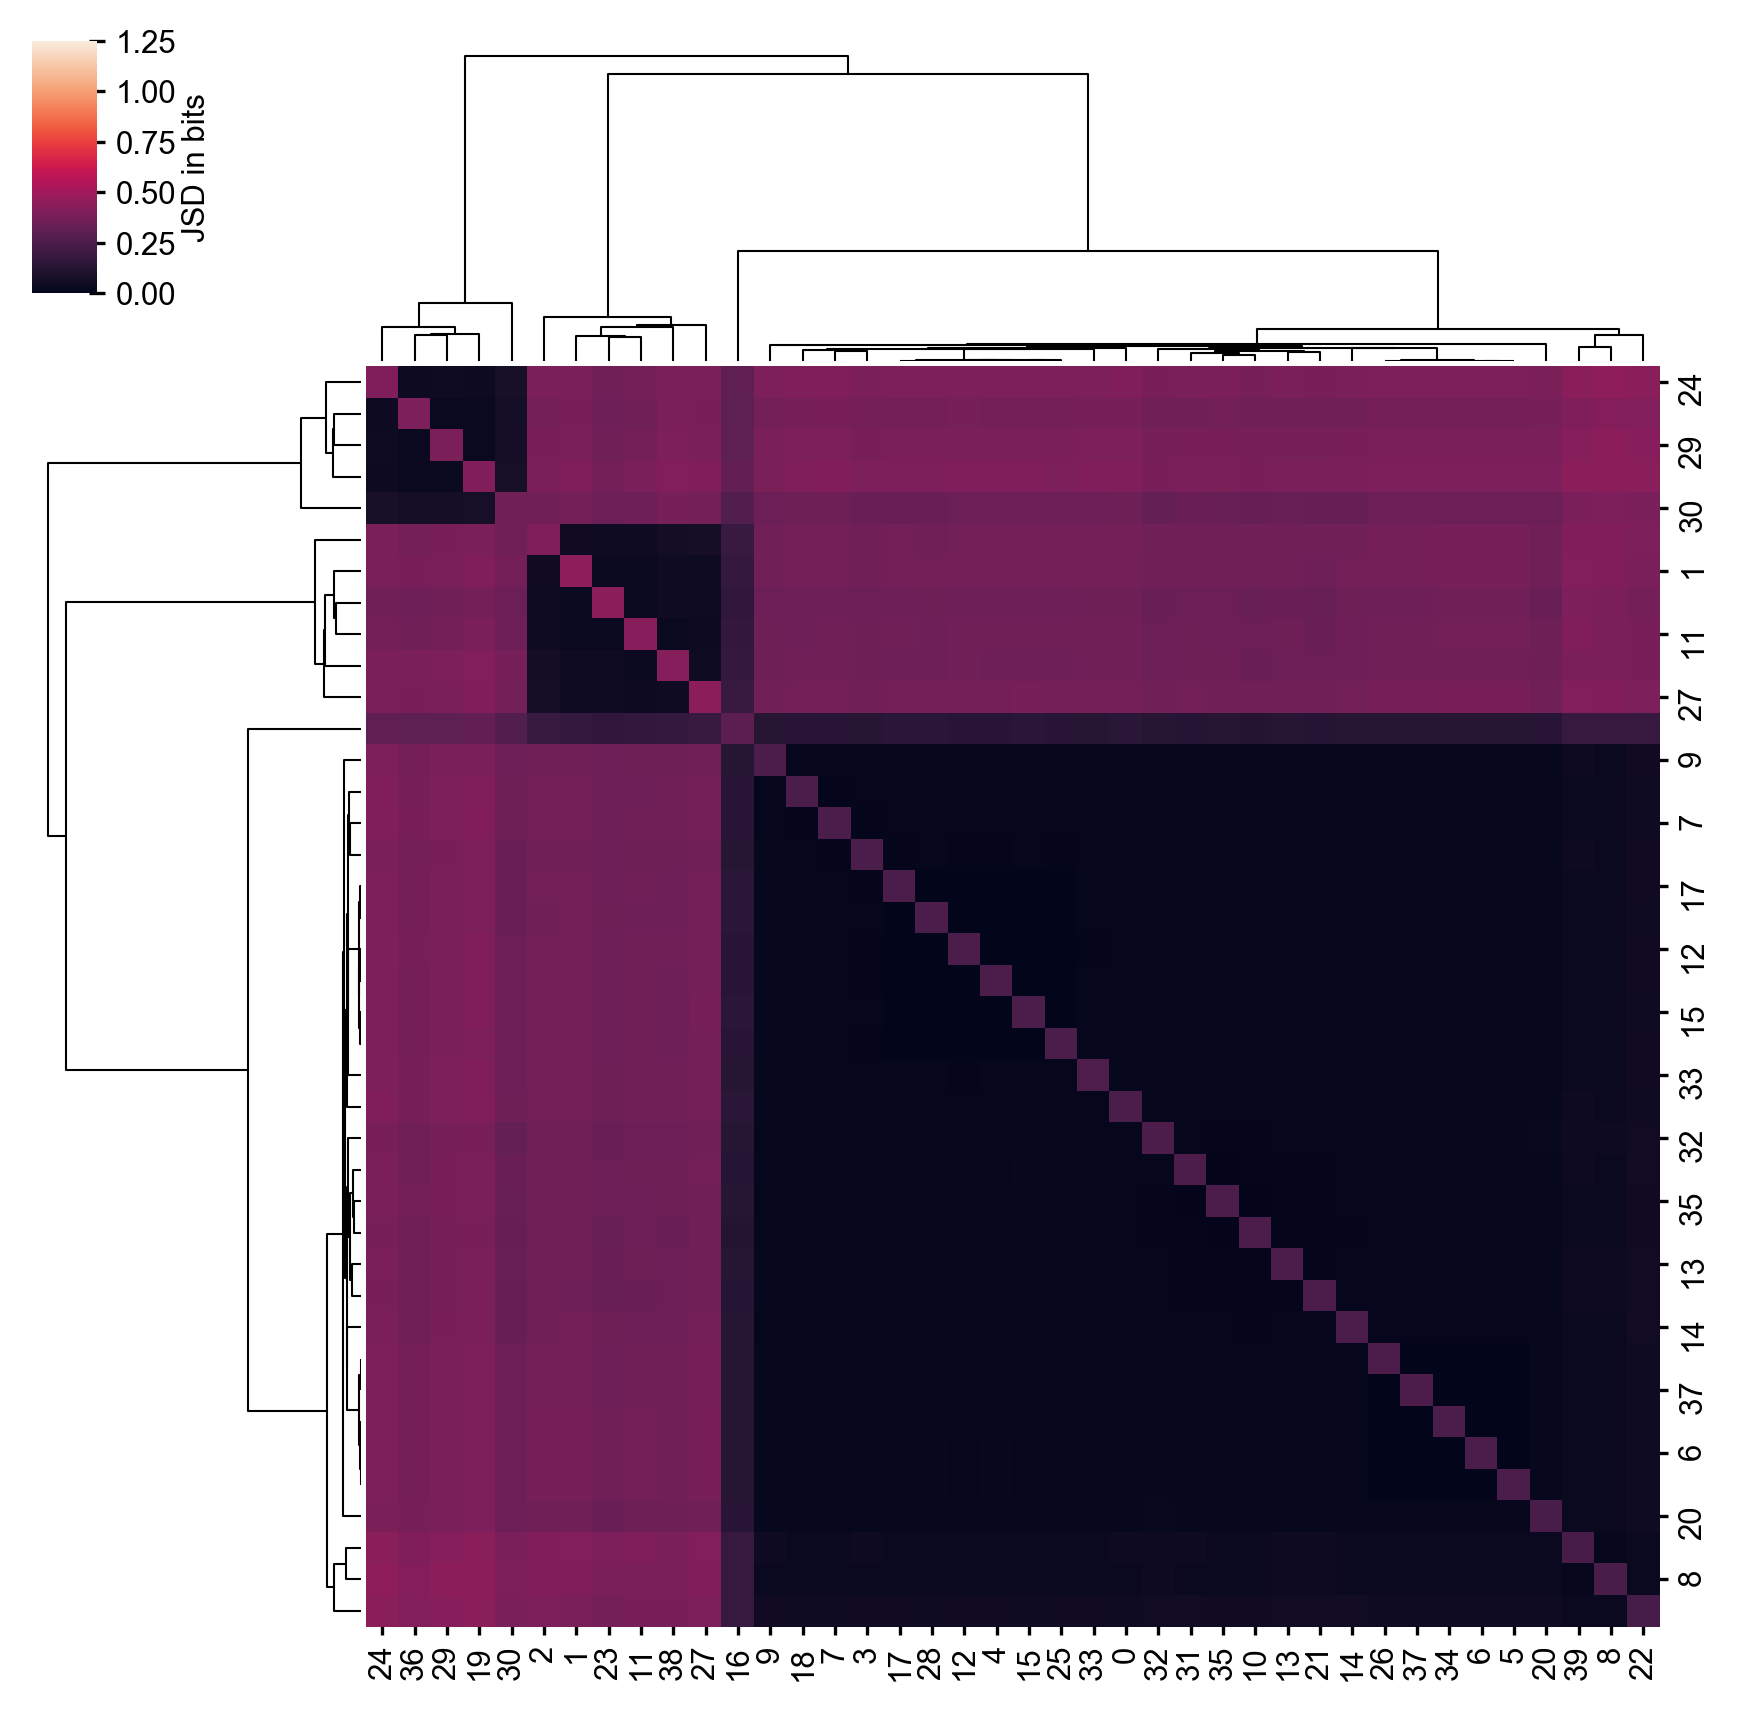

In [144]:
cond_distances = scipy.spatial.distance.squareform(0.5*(distances+distances.T))
Z = scipy.cluster.hierarchy.linkage(cond_distances, method='average', optimal_ordering=True)
heatmap = distances.copy()
for i in range(heatmap.shape[0]):
    heatmap[i, i] = distances_uniform[i]
cg = sns.clustermap(heatmap*4.5, vmin=0.0, vmax=1.25, row_linkage=Z, col_linkage=Z, cbar_kws=dict(label='JSD in bits'), figsize=(7, 7))
plt.savefig('main.png')


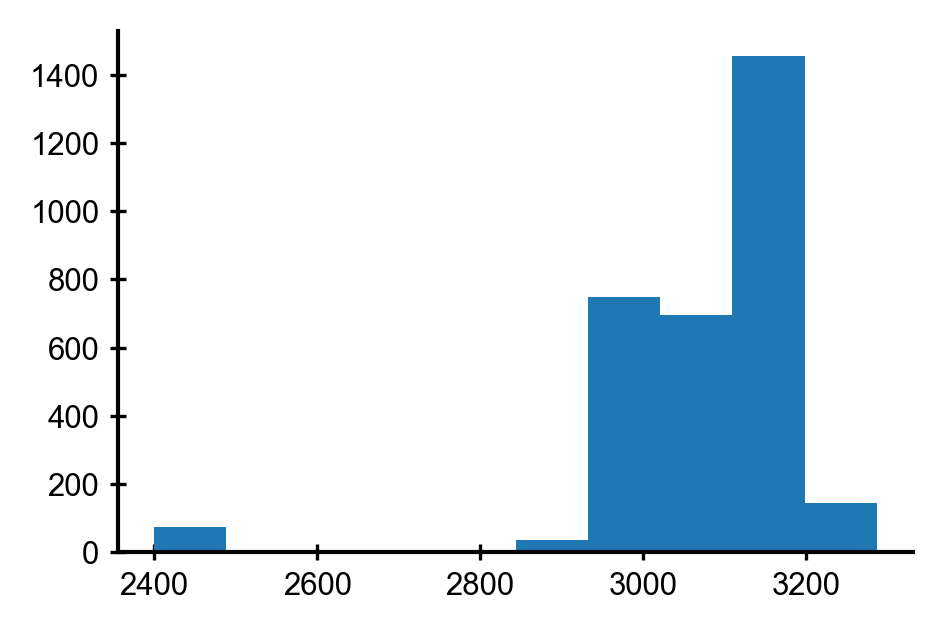

In [145]:
lens = [len(seq) for seq in seqs]
plt.hist(lens);